['mass_all']
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

DPI_75_naive vs. DPI_75_infected: Mann-Whitney-Wilcoxon test two-sided, P_val:6.197e-02 U_stat=1.580e+02
DPI_50_naive vs. DPI_50_infected: Mann-Whitney-Wilcoxon test two-sided, P_val:1.844e-01 U_stat=1.450e+02
DPI_142_naive vs. DPI_142_infected: Mann-Whitney-Wilcoxon test two-sided, P_val:3.837e-01 U_stat=9.100e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

DPI_75_naive vs. DPI_75_infected: Mann-Whitney-Wilcoxon test two-sided, P_val:3.401e-01 U_stat=8.900e+01
DPI_50_naive vs. DPI_50_infected: Mann-Whitney-Wilcoxon test two-sided, P_val:7.716e-01 U_stat=1.200e+02
DPI_142_naive vs. DPI_142_infected: Mann-Whitney-Wilcoxon test two-sided, P_val:3.809e-02 U_stat=6

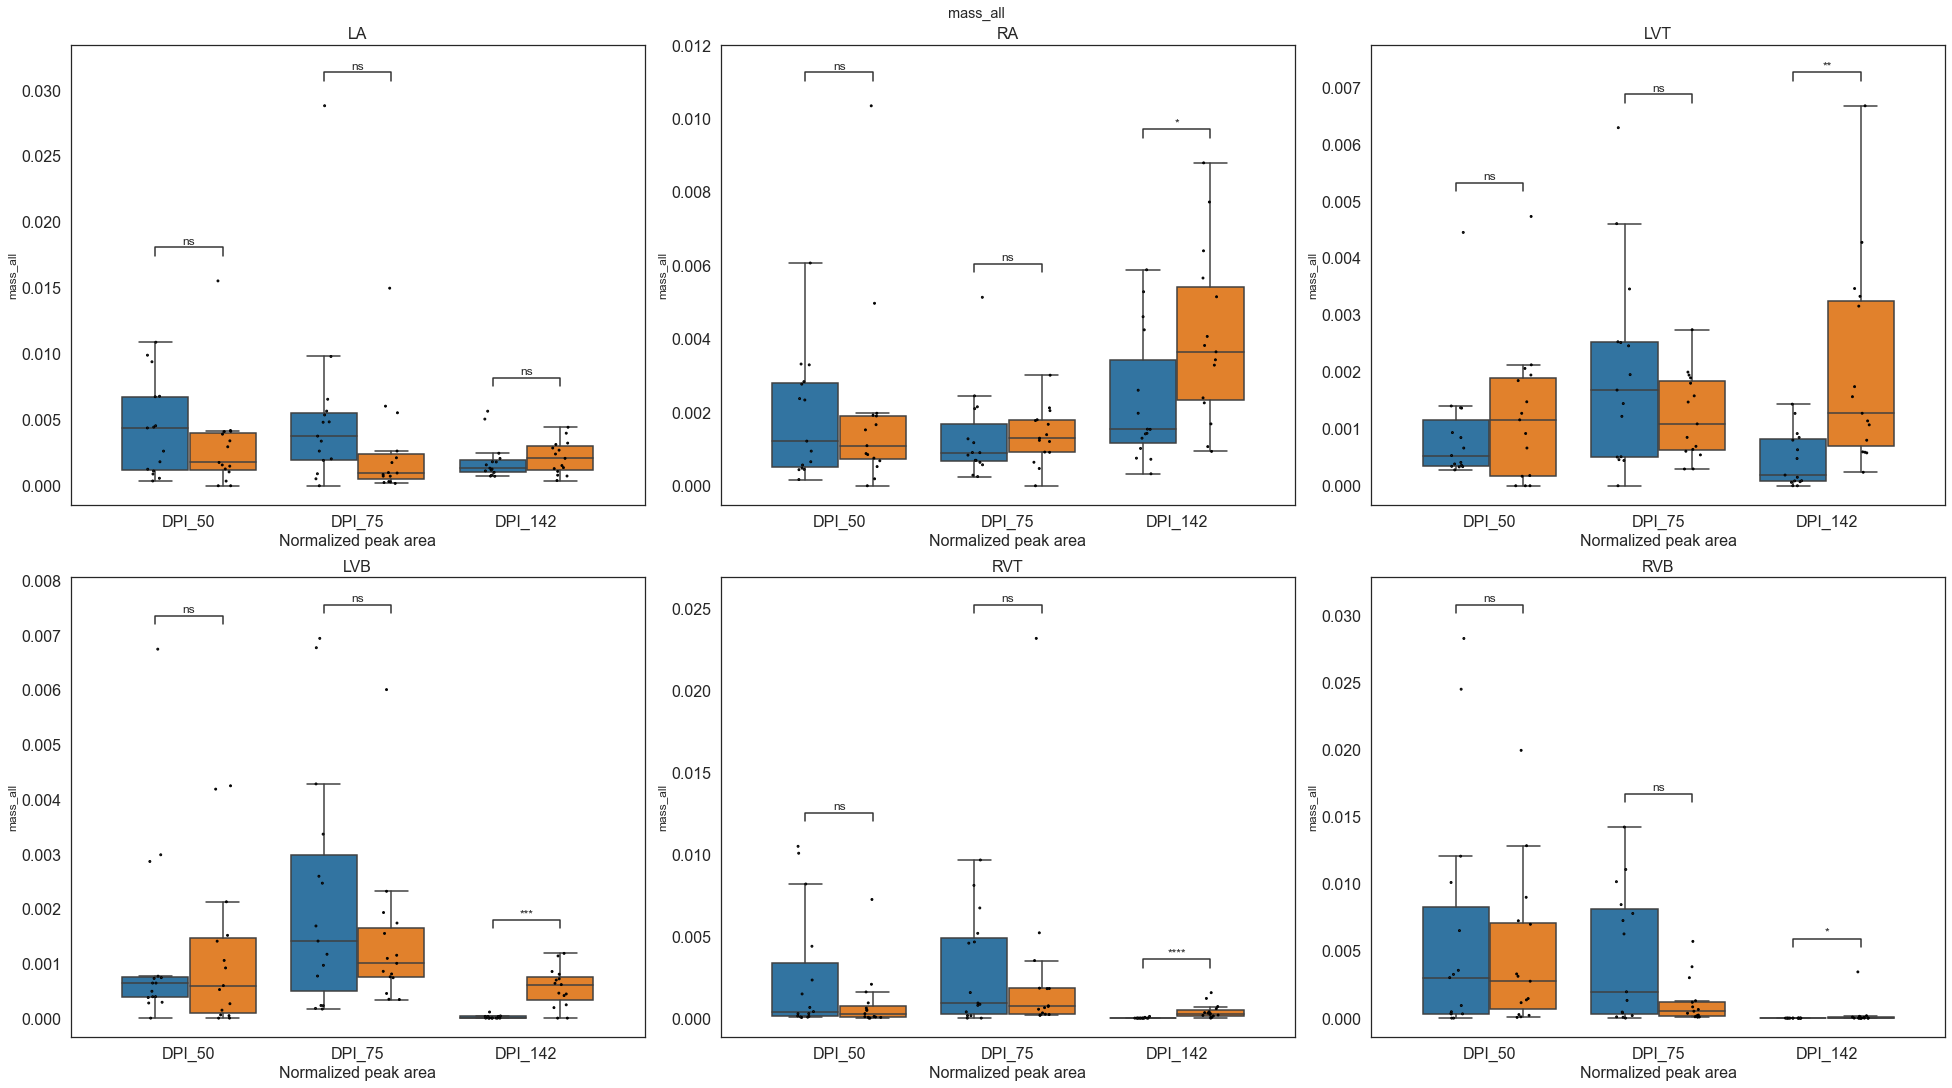

In [2]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statannotations.Annotator import Annotator

data_a = pandas.read_csv('03172021-CAR-M-F-time-sum-all-peaks.csv')

data_LA = data_a[data_a["organ"].isin(["LA"])]
data_RA = data_a[data_a["organ"].isin(["RA"])]
data_LVT = data_a[data_a["organ"].isin(["LV_top"])]
data_LVB = data_a[data_a["organ"].isin(["LV_bottom"])]
data_RVT = data_a[data_a["organ"].isin(["RV_top"])]
data_RVB = data_a[data_a["organ"].isin(["RV_bottom"])]

mass_list = ['mass_all']
print(mass_list)

# change the theme of the plot
sns.set_theme(style="white")

plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)

order = ['DPI_50', 'DPI_75', 'DPI_142']
hue_order = ['naive', 'infected']
pairs = [(("DPI_50", "naive"), ("DPI_50", "infected")), (("DPI_75", "naive"), ("DPI_75", "infected")), (("DPI_142", "naive"), ("DPI_142", "infected"))]


mass_list_number = 1
for mass in mass_list:
    fig, axes = plt.subplots(2, 3, figsize=(27, 15), constrained_layout=True)
    fig.suptitle(mass)
    g1 = sns.boxplot(ax=axes[0, 0], y=data_LA[str(mass)], x=data_LA['DPI'], hue=data_LA['status'], order = order, palette="tab10", showfliers = False)
    g1 = sns.stripplot(ax=axes[0, 0], y=data_LA[str(mass)], x=data_LA['DPI'], hue=data_LA['status'], order = order, dodge=True, color = "black", size=2, edgecolor="black", linewidth=.9)
    axes[0, 0].set_title("LA", fontsize=16)
    axes[0, 0].set_xlabel('Normalized peak area', fontsize=16)
    #axes[0, 0].set_ylabel('', fontsize=16)
    
    annot_1_hue = Annotator(g1, pairs, y=data_LA[str(mass)], x=data_LA['DPI'], hue=data_LA['status'], order=order, hue_order=hue_order)
    annot_1_hue.configure(test='Mann-Whitney',  text_format='star', loc='inside', verbose=2)
    annot_1_hue.apply_test()
    g1, test_results = annot_1_hue.annotate()

    g2 = sns.boxplot(ax=axes[0, 1], y=data_RA[str(mass)], x=data_RA['DPI'], hue=data_RA['status'], order = order, palette="tab10", showfliers = False)
    g2 = sns.stripplot(ax=axes[0, 1], y=data_RA[str(mass)], x=data_RA['DPI'], hue=data_RA['status'], order = order, dodge=True, color = "black", size=2, edgecolor="black", linewidth=.9)
    axes[0, 1].set_title("RA", fontsize=16)
    axes[0, 1].set_xlabel('Normalized peak area', fontsize=16)
    #axes[0, 1].set_ylabel('', fontsize=16)
    
    annot_2_hue = Annotator(g2, pairs, y=data_RA[str(mass)], x=data_RA['DPI'], hue=data_RA['status'], order=order, hue_order=hue_order)
    annot_2_hue.configure(test='Mann-Whitney',  text_format='star', loc='inside', verbose=2)
    annot_2_hue.apply_test()
    g2, test_results = annot_2_hue.annotate()

    g3 = sns.boxplot(ax=axes[0, 2], y=data_LVT[str(mass)], x=data_LVT['DPI'], hue=data_LVT['status'], order = order, palette="tab10", showfliers = False)
    g3 = sns.stripplot(ax=axes[0, 2], y=data_LVT[str(mass)], x=data_LVT['DPI'], hue=data_LVT['status'], order = order, dodge=True, color = "black", size=2, edgecolor="black", linewidth=.9)
    axes[0, 2].set_title("LVT", fontsize=16)
    axes[0, 2].set_xlabel('Normalized peak area', fontsize=16)
    #axes[0, 2].set_ylabel('', fontsize=16)
    
    annot_3_hue = Annotator(g3, pairs, y=data_LVT[str(mass)], x=data_LVT['DPI'], hue=data_LVT['status'], order=order, hue_order=hue_order)
    annot_3_hue.configure(test='Mann-Whitney',  text_format='star', loc='inside', verbose=2)
    annot_3_hue.apply_test()
    g3, test_results = annot_3_hue.annotate()

    g4 = sns.boxplot(ax=axes[1, 0], y=data_LVB[str(mass)], x=data_LVB['DPI'], hue=data_LVB['status'], order = order, palette="tab10", showfliers = False)
    g4 = sns.stripplot(ax=axes[1, 0], y=data_LVB[str(mass)], x=data_LVB['DPI'], hue=data_LVB['status'], order = order, dodge=True, color = "black", size=2, edgecolor="black", linewidth=.9)
    axes[1, 0].set_title("LVB", fontsize=16)
    axes[1, 0].set_xlabel('Normalized peak area', fontsize=16)
    #axes[1, 0].set_ylabel('', fontsize=16)
    
    annot_4_hue = Annotator(g4, pairs, y=data_LVB[str(mass)], x=data_LVB['DPI'], hue=data_LVB['status'], order=order, hue_order=hue_order)
    annot_4_hue.configure(test='Mann-Whitney',  text_format='star', loc='inside', verbose=2)
    annot_4_hue.apply_test()
    g4, test_results = annot_4_hue.annotate()

    g5 = sns.boxplot(ax=axes[1, 1], y=data_RVT[str(mass)], x=data_RVT['DPI'], hue=data_RVT['status'], order = order, palette="tab10", showfliers = False)
    g5 = sns.stripplot(ax=axes[1, 1], y=data_RVT[str(mass)], x=data_RVT['DPI'], hue=data_RVT['status'], order = order, dodge=True, color = "black", size=2, edgecolor="black", linewidth=.9)
    axes[1, 1].set_title("RVT", fontsize=16)
    axes[1, 1].set_xlabel('Normalized peak area', fontsize=16)
    #axes[1, 1].set_ylabel('', fontsize=16)
    
    annot_5_hue = Annotator(g5, pairs, y=data_RVT[str(mass)], x=data_RVT['DPI'], hue=data_RVT['status'], order=order, hue_order=hue_order)
    annot_5_hue.configure(test='Mann-Whitney',  text_format='star', loc='inside', verbose=2)
    annot_5_hue.apply_test()
    g5, test_results = annot_5_hue.annotate()
    
    g6 = sns.boxplot(ax=axes[1, 2], y=data_RVB[str(mass)], x=data_RVB['DPI'], hue=data_RVB['status'], order = order, palette="tab10", showfliers = False)
    g6 = sns.stripplot(ax=axes[1, 2], y=data_RVB[str(mass)], x=data_RVB['DPI'], hue=data_RVB['status'], order = order, dodge=True, color = "black", size=2, edgecolor="black", linewidth=.9)
    axes[1, 2].set_title("RVB", fontsize=16)
    axes[1, 2].set_xlabel('Normalized peak area', fontsize=16)
    #axes[1, 2].set_ylabel('', fontsize=16)
    
    annot_6_hue = Annotator(g6, pairs, y=data_RVB[str(mass)], x=data_RVB['DPI'], hue=data_RVB['status'], order=order, hue_order=hue_order)
    annot_6_hue.configure(test='Mann-Whitney',  text_format='star', loc='inside', verbose=2)
    annot_6_hue.apply_test()
    g6, test_results = annot_6_hue.annotate()
    
    #sns.move_legend(g1, "upper right")
    #sns.move_legend(g2, "upper right")
    #sns.move_legend(g3, "upper right")
    #sns.move_legend(g4, "upper right")
    #sns.move_legend(g5, "upper right")
    #sns.move_legend(g6, "upper right")
    g1.legend([],[], frameon=False)
    g2.legend([],[], frameon=False)
    g3.legend([],[], frameon=False)
    g4.legend([],[], frameon=False)
    g5.legend([],[], frameon=False)
    g6.legend([],[], frameon=False)
    plt.savefig("6-HS-boxplot-CAR-time-sum-all-peaks-" + str(mass) + ".png", dpi=300, bbox_inches='tight')
    mass_list_number += 1
